<h1><center>Data Scientist Challenge - LATAM Airlines</center></h1>
<h2><center>María Ignacia Loyola Fraile</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
def listas_por_pantalla(lista):
    n = len(lista)
    for indice in range(n):
        print(lista[indice])
    print(' ')
    print('Total: ' + str(n))

In [3]:
def temporada_alta(data, fecha):
    
    
    lista = []
    indice_fecha = data.columns.get_loc(fecha)
    
    for indice in range(data.shape[0]):
        if ((data.iloc[indice, indice_fecha].month == 1) | (data.iloc[indice, indice_fecha].month == 2)):
            lista.append(1)
        elif ((data.iloc[indice, indice_fecha].month == 12) & (data.iloc[indice, indice_fecha].day >= 15)):
            lista.append(1)
        elif ((data.iloc[indice, indice_fecha].month == 3) & (data.iloc[indice, indice_fecha].day <= 3)):
            lista.append(1)
            
        elif ((data.iloc[indice, indice_fecha].month == 7) & (data.iloc[indice, indice_fecha].day >= 15 )):
            lista.append(1)
        
        elif ((data.iloc[indice, indice_fecha].month == 9) & (data.iloc[indice, indice_fecha].day >= 11)):
            lista.append(1)
        
        else:
            lista.append(0)
    return lista

In [4]:
def periodo_dia(data, col):
    
    periodos = []
    indice_col = data.columns.get_loc(col)
    
    for indice in range(data.shape[0]):
        
        if ((data.iloc[indice, indice_col].hour >= 5) & (data.iloc[indice, indice_col].hour < 12)):
            periodos.append('mañana')
        
        elif ((data.iloc[indice, indice_col].hour >= 12) & (data.iloc[indice, indice_col].hour < 19)):
            periodos.append('tarde')
        else:
            periodos.append('noche')
    return periodos
        
        

In [78]:
def dif_min(data, dife_hrs, dife_min):
    
    indice_hrs = data.columns.get_loc(dife_hrs)
    indice_min = data.columns.get_loc(dife_min)
    minutos = []
    retrasos = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_hrs] < 0):
            minutos.append((60-data.iloc[indice, indice_min])*(-1))
            retrasos.append('No')
            
        elif(data.iloc[indice, indice_hrs] == 0):
            minutos.append(data.iloc[indice, indice_min])
            retrasos.append('Sí')
            
        else:
            minutos.append(((data.iloc[indice, indice_hrs])*60) + data.iloc[indice, indice_min])
            retrasos.append('Sí')
    data['dif_min'] = minutos
    data['Retraso(SI/NO)'] = retrasos
    
    
    

In [82]:
def minutos_totales(data, fecha_I, fecha_O):
    
    data['TimeDelta'] = data[fecha_O] - data[fecha_I]
    minutos = []
    horas = []
    for indice in range(data.shape[0]):
        horas.append(data.iloc[indice,-1].total_seconds()//3600)
        minutos.append((data.iloc[indice,-1].total_seconds()%3600)//60)
        
    data['dif_hrs'] = horas
    data['dif_minn'] = minutos
    
    dif_min(data, 'dif_hrs','dif_minn')
    
    
    
    

In [86]:
def atraso_15(data, dif_min):
    
    indice_dif_min = data.columns.get_loc(dif_min)
    retraso_15 = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_dif_min] > 15):
            retraso_15.append(1)
            
        else:
            retraso_15.append(0)
            
    return retraso_15

In [74]:
data = pd.read_csv('C:/Users/Ignacia/Desktop/Ignacia/Postulaciones/LATAM/dataset_SCL.csv')

C:\Users\Ignacia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'], dayfirst=False)
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'],dayfirst=False)

In [76]:
data['temporada_alta'] = temporada_alta(data, 'Fecha-I')

In [77]:
data['periodo_dia'] = periodo_dia(data,'Fecha-I')

In [80]:
minutos_totales(data,'Fecha-I','Fecha-O')

In [83]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia',
       'TimeDelta', 'dif_hrs', 'dif_minn', 'dif_min', 'Retraso(SI/NO)'],
      dtype='object')

In [84]:
data = data.drop(['TimeDelta', 'dif_hrs', 'dif_minn'],axis = 1)

In [87]:
data['atraso_15'] = atraso_15(data, 'dif_min')

# Análisis Exploratorio

In [89]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia',
       'dif_min', 'Retraso(SI/NO)', 'atraso_15'],
      dtype='object')

In [90]:
data.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,periodo_dia,dif_min,Retraso(SI/NO),atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Domingo,I,American Airlines,Santiago,Miami,1,noche,3.0,Sí,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Lunes,I,American Airlines,Santiago,Miami,1,noche,9.0,Sí,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Martes,I,American Airlines,Santiago,Miami,1,noche,9.0,Sí,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Miercoles,I,American Airlines,Santiago,Miami,1,noche,3.0,Sí,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Jueves,I,American Airlines,Santiago,Miami,1,noche,-2.0,No,0


In [92]:
data['Ori-O'].unique()

array(['SCEL'], dtype=object)

In [101]:
#Todos lo vuelos llegan a su destino programado ?

def destinos(data, des_o, des_i):
    
    indice_des_o = data.columns.get_loc(des_o)
    indice_des_i = data.columns.get_loc(des_i)
    cambio_destino = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice,indice_des_o] != data.iloc[indice, indice_des_i]):
            cambio_destino.append(1)
        else:
            cambio_destino.append(0)
    data['Cambio de des'] = cambio_destino
    
            
    

In [99]:
destinos(data,'Des-O','Des-I')

In [100]:
data['Cambio'].unique()

array([0, 1], dtype=int64)

In [105]:
data.groupby(['Cambio'])['Retraso(SI/NO)'].count()

Cambio
0    68178
1       28
Name: Retraso(SI/NO), dtype: int64

In [110]:
data.groupby(['Cambio','OPERA','Retraso(SI/NO)'])['temporada_alta'].count()

Cambio  OPERA                     Retraso(SI/NO)
0       Aerolineas Argentinas     No                  711
                                  Sí                 1238
        Aeromexico                No                  251
                                  Sí                  100
        Air Canada                No                  103
                                  Sí                  462
        Air France                No                  192
                                  Sí                  166
        Alitalia                  No                   95
                                  Sí                  164
        American Airlines         No                  489
                                  Sí                  268
        Austral                   No                   24
                                  Sí                   50
        Avianca                   No                  419
                                  Sí                  733
        British Airways

In [111]:
def dif_I_O(data, col, cols):
    
    indice_col = data.columns.get_loc(col)
    indice_cols = data.columns.get_loc(cols)
    cont = 0
    aux = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] != data.iloc[indice, indice_cols]):
            cont += 1
            aux.append('Sí')
        else:
            aux.append('No')
            
    if(cont != 0):
        data[col + '/' + cols] = aux
        
    else:
        return None

In [112]:
dif_I_O(data, 'Des-O','Des-I')

In [114]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia',
       'dif_min', 'Retraso(SI/NO)', 'atraso_15', 'Cambio', 'Des-O/Des-I'],
      dtype='object')

In [115]:
dif_I_O(data, 'Emp-O','Emp-I')

In [117]:
dif_I_O(data,'Vlo-O','Vlo-I')

# Gráficos

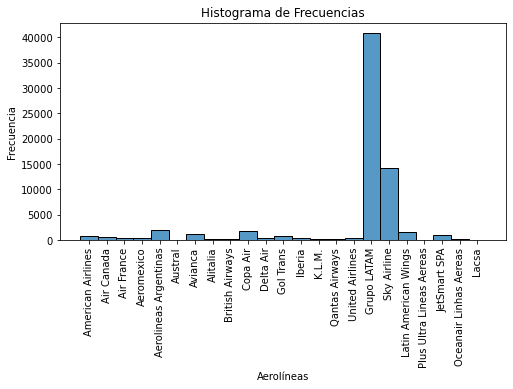

In [121]:
plt.figure(figsize=(8,4))
sns.histplot(data=data, x="OPERA")
plt.xticks(rotation=90)
plt.xlabel('Aerolíneas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')
plt.show()

In [124]:
data['Des-O'].unique()
data['OPERA'].unique()
#Recortdar que son 63 destinos

array(['American Airlines', 'Air Canada', 'Air France', 'Aeromexico',
       'Aerolineas Argentinas', 'Austral', 'Avianca', 'Alitalia',
       'British Airways', 'Copa Air', 'Delta Air', 'Gol Trans', 'Iberia',
       'K.L.M.', 'Qantas Airways', 'United Airlines', 'Grupo LATAM',
       'Sky Airline', 'Latin American Wings', 'Plus Ultra Lineas Aereas',
       'JetSmart SPA', 'Oceanair Linhas Aereas', 'Lacsa'], dtype=object)

In [ ]:
def mapa_colores(n, col, data):
    
    import random
    
    colores = []
    indice_col = data.columns.get_loc(col)
    valores = data[col].unique().tolist()
    for indice in range(data.shape[0]):
        
        
    
    

In [122]:
#histograma de frecuencias de cantidad de retrasos de 15, por aerolinea
plt.figure(figsize=(8,4))

#sns.histplot(data=data, x="OPERA")
#plt.xticks(rotation=90)
#plt.xlabel('Aerolíneas')
#plt.ylabel('Frecuencia')
#plt.title('Histograma de Frecuencias')
#plt.show()

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [131]:
print('-----------------------------------------------------------------------------------------------------------------')
print('                                              Información Base')
print('-----------------------------------------------------------------------------------------------------------------')
print('Cantidad de variables(columnas) presentes en el dataset: ')
listas_por_pantalla(data.columns.unique().tolist())
print('')
print('Cantidad de vuelos(filas) presentes en el dataset: ' + str(data.shape[0]))
print('')
print('Cantidad de aerolíneas presentes en el dataset: ')
listas_por_pantalla(data['OPERA'].unique().tolist())

-----------------------------------------------------------------------------------------------------------------
                                              Información Base
-----------------------------------------------------------------------------------------------------------------
Cantidad de variables(columnas) presentes en el dataset: 
Fecha-I
Vlo-I
Ori-I
Des-I
Emp-I
Fecha-O
Vlo-O
Ori-O
Des-O
Emp-O
DIA
MES
AÑO
DIANOM
TIPOVUELO
OPERA
SIGLAORI
SIGLADES
temporada_alta
periodo_dia
dif_min
Retraso(SI/NO)
atraso_15
Cambio
Des-O/Des-I
Emp-O/Emp-I
Vlo-O/Vlo-I
 
Total: 27

Cantidad de vuelos(filas) presentes en el dataset: 68206

Cantidad de aerolíneas presentes en el dataset: 
American Airlines
Air Canada
Air France
Aeromexico
Aerolineas Argentinas
Austral
Avianca
Alitalia
British Airways
Copa Air
Delta Air
Gol Trans
Iberia
K.L.M.
Qantas Airways
United Airlines
Grupo LATAM
Sky Airline
Latin American Wings
Plus Ultra Lineas Aereas
JetSmart SPA
Oceanair Linhas Aereas
Lacsa
 
Total: 23